# Aula 7: 

In [1]:
import numpy as np
import sympy as sy

from scipy.linalg import expm
from IPython.display import display, Math
from  scipy.special import factorial


import matplotlib.pyplot as plt

In [2]:
class ObjQuantico:
    def __init__(self, data,latex_representation=None):
        self.dados = data
        self.latex_representation = latex_representation

    def definir_dados(self, data):
        self.dados = data

    def full(self):
        return self.dados
    
    def dim(self):
        return len(self.dados)
    
    def dag(self):
        return ObjQuantico(np.conjugate(self.dados.T))
    
    def traço(self):
        return np.trace(self.dados).real
    
    def Autovalores(self):
        return np.linalg.eigvals(self.dados)
    
    def Autovetores(self):
        return np.linalg.eig(self.dados)[1]
    
    def AutoValor_vetor(self):
        return np.linalg.eig(self.dados)[1]
    
    def expM(self):
        return ObjQuantico(expm(self.dados)) 

    def __repr__(self):
        if self.latex_representation:
            display(Math(self.latex_representation))
        else:
            display(Math(sy.latex(sy.Matrix(self.dados))))
        return f"ObjQuantico: dim ={self.dim()} , shape = {self.dados.shape}" 
    
    def __mul__(self, other):
        # Multiplicação para diferentes tipos
        if isinstance(other, ObjQuantico):  
            # Multiplicação matricial com outra instância de ObjQuantico
            return ObjQuantico(np.dot(self.dados, other.dados))
        elif np.isscalar(other):  # Multiplicação por escalar
            return ObjQuantico(self.dados * other)
        else:
            raise TypeError(f"Multiplicação não suportada entre {type(other)} e ObjQuantico")

    def __rmul__(self, other):
        if np.isscalar(other):  # Multiplicação reversa por escalar
            return ObjQuantico(self.dados * other)
        else:
            raise TypeError(f"Multiplicação não suportada entre {type(other)} e ObjQuantico")
        
    def __sub__(self, other):
        if isinstance(other, ObjQuantico):  
            # Subtração entre duas instâncias de ObjQuantico
            return ObjQuantico(self.dados - other.dados)
        else:
            raise TypeError(f"Subtração não suportada entre {type(other)} e ObjQuantico")
       
    def __add__(self, other):
        if isinstance(other, ObjQuantico):  
            # Soma os dados de dois objetos ObjQuantico
            return ObjQuantico(self.dados + other.dados)
        else:
            raise TypeError(f"Soma não suportada entre {type(other)} e ObjQuantico")
        
    def __sub__(self, other):
        if isinstance(other, ObjQuantico):  
            # Subtração entre duas instâncias de ObjQuantico
            return ObjQuantico(self.dados - other.dados)
        elif isinstance(other, np.ndarray):  # Subtração com arrays NumPy
            return ObjQuantico(self.dados - other)
        else:
            raise TypeError(f"Subtração não suportada entre {type(other)} e ObjQuantico")
    
    def __rsub__(self, other):
        if isinstance(other, np.ndarray):  # Subtração com arrays NumPy (comutada)
            return ObjQuantico(other - self.dados)
        else:
            raise TypeError(f"Subtração não suportada entre {type(other)} e ObjQuantico")   

    def __truediv__(self, other):
        if isinstance(other, (int, float)):  # Divisão por um número escalar
            return ObjQuantico(self.dados / other)
        else:
            raise TypeError(f"Divisão não suportada entre {type(other)} e ObjQuantico")
    
    def __rtruediv__(self, other):
        if isinstance(other, (int, float)):  # Divisão invertida por um número escalar
            return ObjQuantico(other / self.dados)
        else:
            raise TypeError(f"Divisão não suportada entre {type(other)} e ObjQuantico")     
    
    def __matmul__(self, other):
        """Implementa o operador @ para o produto tensorial."""
        if isinstance(other, ObjQuantico):
            return ObjQuantico(np.kron(self.full(), other.full()))
        else:
            raise TypeError(f"Operador @ não suportado entre {type(self)} e {type(other)}")
    
    
def bases(N,n):
    estadoinicial = np.zeros(shape=(N, 1))*(0+0j)
    estadoinicial[n, 0] = 1
    return ObjQuantico(estadoinicial) 
  
def ket(entrada):
    if isinstance(entrada, str):
        if entrada == '0':
            dados = np.array([[1], [0]])
            latex_representation = r"$$ \ket{0} $$"  # LaTeX para o ket |0>
            return ObjQuantico(dados, latex_representation)
        elif entrada == '1':
            dados = np.array([[0], [1]])
            latex_representation = r"$$ \ket{1} $$"  # LaTeX para o ket |1>
            return ObjQuantico(dados, latex_representation)
    else:
        try:
            return ObjQuantico(entrada)
        except ValueError:
            return print("Entrada invalida.") 
         
def bra(entrada):
    if isinstance(entrada, str):
        if entrada == '0':
            dados = np.array([[1], [0]])
            latex_representation = r"$$ \bra{0} $$"  # LaTeX para o ket |0>
            return ObjQuantico(dados, latex_representation)
        elif entrada == '1':
            dados = np.array([[0], [1]])
            latex_representation = r"$$ \bra{1} $$"  # LaTeX para o ket |0>
            return ObjQuantico(dados, latex_representation)
    else:
        try:
            return ObjQuantico(entrada)
        except ValueError:
            return print("Entrada invalida.")      

def destruiçao(N):
    subdiag = np.sqrt(np.arange(1, N))# Monta os elementos na subdiagonal
    dt      = np.diag(subdiag, k=1) # Operador de destruição
    return ObjQuantico(dt)

def criaçao(N):
    return  destruiçao(N).dag()    
   
def Identidade(N):
    matriz = np.identity(N)
    return ObjQuantico(matriz) 

def pauliX():
    m = np.array([[ 0, 1 ],[ 1, 0 ]])
    latex_representation = r"$$ \hat{\sigma_x} $$"
    return ObjQuantico(m,latex_representation)

def pauliY():
    m = np.array([[ 0, -1j ],[ 1j, 0 ]])
    latex_representation = r"$$ \hat{\sigma_y} $$"  
    return ObjQuantico(m,latex_representation)

def pauliZ():
    m = np.array([[ 1, 0 ],[ 0, -1 ]])
    latex_representation = r"$$ \hat{\sigma_z} $$"  
    return ObjQuantico(m,latex_representation)

def Fock(N, n=0):
    "Equivalente a função bases"
    return bases(N, n)

def coerente(N,alpha,metodo ="operador"):
    if metodo == "operador" :
        estado  = bases(N,0) # estado inicinal no vacuo
        D       = alpha * destruiçao(N).dag() - np.conj(alpha) * destruiçao(N)
        D       = D.expM()
        return D*estado
    
    elif metodo == "analitico":    
        estado  = np.zeros(shape=(N,1),dtype=complex)
        n       = np.arange(N)
        estado[:,0] = np.exp(-(abs(alpha) ** 2 )/ 2.0) * (alpha**n)/np.sqrt(factorial(n))
        return estado
    else:
        raise TypeError(
            "A opção de método tem as seguintes opções :'operador' ou 'analitico'")
        

# Solver With scipy

## Equação linear

Resolver um problema de valor inicial para um sistema de EDOs:

Esta função integra numericamente um sistema de equações diferenciais ordinárias dado um valor inicial:

$$
\frac{dy}{dt} = f(t, y),
\quad y(t_0) = y_0
$$

*   Métodos de integração disponíveis:

- **‘RK45’ (padrão):** Método de Runge-Kutta explícito de ordem 5(4)

- **‘RK23’:** Método de Runge-Kutta explícito de ordem 3(2).
- **‘DOP853’:** Método de Runge-Kutta explícito de ordem 8.

- **‘Radau’:** Método de Runge-Kutta implícito da família Radau IIA de ordem 5.

- **‘BDF’:** Método multi-passo implícito de ordem variável (1 a 5) baseado na fórmula de diferenciação retroativa para a aproximação da derivada.

- **‘LSODA’:** Método Adams/BDF com detecção automática de rigidez e alternância.



In [3]:
from scipy.integrate import solve_ivp
from scipy.linalg import expm

# Definir a função que representa o sistema de EDOs
def ODE(t, y, M, b):
    """
    Sistema de EDOs no formato dy/dt = M*y + b.
    
    Args:
        t (float): Tempo atual (não usado diretamente na função mas necessário para solve_ivp).
        y (ndarray): Vetor estado atual.
        M (ndarray): Matriz de coeficientes.
        b (ndarray): Vetor de termo constante.

    Returns:
        dydt (ndarray): Derivada de y.
    """
    return M @ y + b  # Produto matriz-vetor e soma do termo constante

def exact_solution(t, t0, y0, M, b):
    """
    Solução exata para o sistema dy/dt = M*y + b.

    Args:
        t (float or ndarray): Tempo(s) onde a solução será avaliada.
        t0 (float): Tempo inicial.
        y0 (ndarray): Vetor inicial.
        M (ndarray): Matriz de coeficientes.
        b (ndarray): Vetor de termo constante.

    Returns:
        y_exact (ndarray): Solução exata no(s) tempo(s) especificado(s).
    """
    delta_t = t - t0
    exp_M_dt = expm(M * delta_t)  # Calcula e^(M * delta_t)
    if np.linalg.det(M) != 0:  # Verifica se M é inversível
        M_inv = np.linalg.inv(M)
        correction = M_inv @ (exp_M_dt - np.eye(M.shape[0])) @ b
    else:
        # Caso M não seja inversível, apenas considera o termo homogêneo
        correction = np.zeros_like(y0)
    return exp_M_dt @ y0 + correction


In [4]:
np.random.seed(42)
# Parâmetros do problema
M  = -30*np.random.random((2,2))  # Matriz 2x2 de exemplo
b  = np.array([0, 0])           # Vetor constante de exemplo
y0 = np.array([1, 1])          # Condição inicial
t0, tf = 0, 1                 # Intervalo de tempo


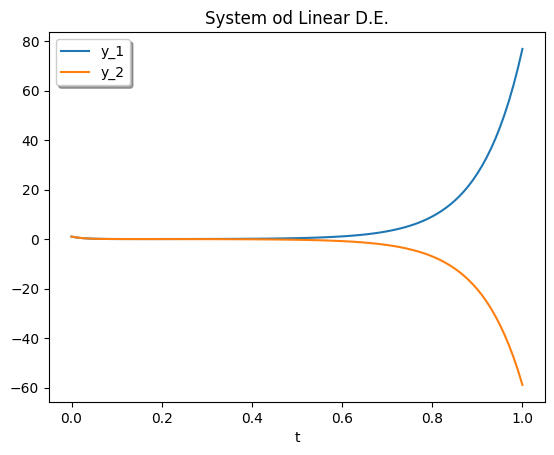

In [5]:
# Resolver o sistema
solution = solve_ivp(
    ODE, (t0, tf), y0, args=(M, b), 
    t_eval = np.linspace(t0, tf, 101),
    method = 'RK45')

plt.plot(solution.t,solution.y[0])
plt.plot(solution.t,solution.y[1])
plt.xlabel('t')
plt.legend(['y_1', 'y_2'], shadow=True)
plt.title('System od Linear D.E.')
plt.show()

Determinando o erro 

In [6]:
# Solução exata
y_exact_all = np.array([exact_solution(t, t0, y0, M, b) for t in solution.t])

# Erro absoluto
erro_absoluto = np.mean(np.abs(solution.y[0]- y_exact_all[:,0]))
print(erro_absoluto)

erro_absoluto = np.mean(np.abs(solution.y[1]- y_exact_all[:,1]))
print(erro_absoluto)

0.002051970985138839
0.0020886360733106558


*   DOP853: Explicit Runge-Kutta method of order 8.

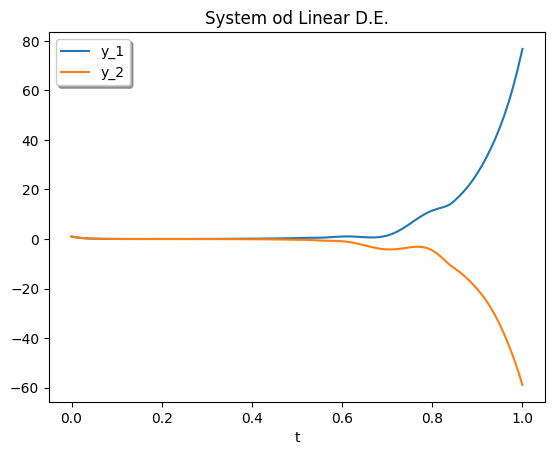

0.3165899445937532
0.32226145486374785


In [7]:
# Resolver o sistema
solution = solve_ivp(
    ODE, (t0, tf), y0, args=(M, b), 
    t_eval = np.linspace(t0, tf, 101),
    method = 'DOP853')

plt.plot(solution.t,solution.y[0])
plt.plot(solution.t,solution.y[1])
plt.xlabel('t')
plt.legend(['y_1', 'y_2'], shadow=True)
plt.title('System od Linear D.E.')
plt.show()

# Solução exata
y_exact_all = np.array([exact_solution(t, t0, y0, M, b) for t in solution.t])

# Erro absoluto
erro_absoluto = np.mean(np.abs(solution.y[0]- y_exact_all[:,0]))
print(erro_absoluto)

erro_absoluto = np.mean(np.abs(solution.y[1]- y_exact_all[:,1]))
print(erro_absoluto)

*   Radau: Implicit Runge-Kutta method of Radau IIA family of order 5.

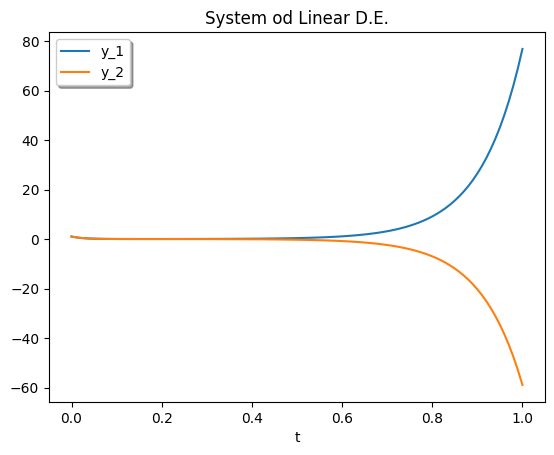

0.0005855549070862316
0.00044972960318606826


In [8]:
# Resolver o sistema
solution = solve_ivp(
    ODE, (t0, tf), y0, args=(M, b), 
    t_eval = np.linspace(t0, tf, 101),
    method = 'Radau')

plt.plot(solution.t,solution.y[0])
plt.plot(solution.t,solution.y[1])
plt.xlabel('t')
plt.legend(['y_1', 'y_2'], shadow=True)
plt.title('System od Linear D.E.')
plt.show()

# Solução exata
y_exact_all = np.array([exact_solution(t, t0, y0, M, b) for t in solution.t])

# Erro absoluto
erro_absoluto = np.mean(np.abs(solution.y[0]- y_exact_all[:,0]))
print(erro_absoluto)

erro_absoluto = np.mean(np.abs(solution.y[1]- y_exact_all[:,1]))
print(erro_absoluto)

*   LSODA: Adams/BDF method with automatic stiffness detection and switching.

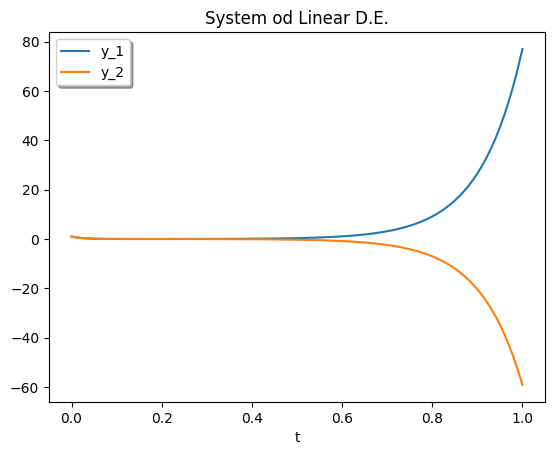

0.026623054938747157
0.020467056716387117


In [9]:
# Resolver o sistema
solution = solve_ivp(
    ODE, (t0, tf), y0, args=(M, b), 
    t_eval = np.linspace(t0, tf, 101),
    method = 'LSODA')

plt.plot(solution.t,solution.y[0])
plt.plot(solution.t,solution.y[1])
plt.xlabel('t')
plt.legend(['y_1', 'y_2'], shadow=True)
plt.title('System od Linear D.E.')
plt.show()

# Solução exata
y_exact_all = np.array([exact_solution(t, t0, y0, M, b) for t in solution.t])

# Erro absoluto
erro_absoluto = np.mean(np.abs(solution.y[0]- y_exact_all[:,0]))
print(erro_absoluto)

erro_absoluto = np.mean(np.abs(solution.y[1]- y_exact_all[:,1]))
print(erro_absoluto)

## Modelo de JaynesCummings

$$
\hat{H} = \frac{\hbar \omega_0}{2} \hat{\sigma}_z + \hbar \omega a^\dagger a + \hbar g \left( \hat{\sigma}_+ a + \hat{\sigma}_- a^\dagger \right)
$$


In [10]:
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength

basefock = 2

psi0 = bases(basefock, 0)@ bases(2, 0)

# cavity mode operator
a = destruiçao(basefock)@Identidade(2)

# qubit/atom operators
sm = Identidade(basefock)@(destruiçao(2).dag())  # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H_acomplamento = g * ( a*(sm.dag()) + a.dag()*sm )

H = wc * a.dag() * a  + wa * sm.dag()*sm + H_acomplamento

\begin{equation}
\frac{d}{dt}\ket{\psi} = -\frac{i}{h}\hat{H} \ket{\psi}
\end{equation}

In [11]:
# Função que define o sistema de EDOs no formato dy/dt = M*y 
def ODE_Schrodinger_vector(t, y, H_matrix):
    dydt = -1j * H_matrix @ y  # A equação de Schrödinger
    return dydt

### RK45

In [12]:
psi0.full().flatten()

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [13]:
# Resolver as EDOs
t_eval      = np.linspace(0, 10, 100)  # Pontos de avaliação
solution    = solve_ivp(ODE_Schrodinger_vector, (0, 10), psi0.full().flatten(), args=(H.full(),), t_eval=t_eval)

Calculo do valor esperado :

\begin{equation}
\braket{\hat{O_i}}
\end{equation}

In [14]:
# Função para calcular o valor esperado
def expected_value(state, observable):
    """
    Calcula o valor esperado de uma observável dado o estado.
    
    Args:
        state (ndarray): Vetor de estado no instante de tempo (shape (4,)).
        observable (ndarray): Matriz da observável (shape (4, 4)).
    
    Returns:
        float: Valor esperado.
    """
    state_conj = np.conjugate(state)
    return np.real(state_conj @ (observable @ state))

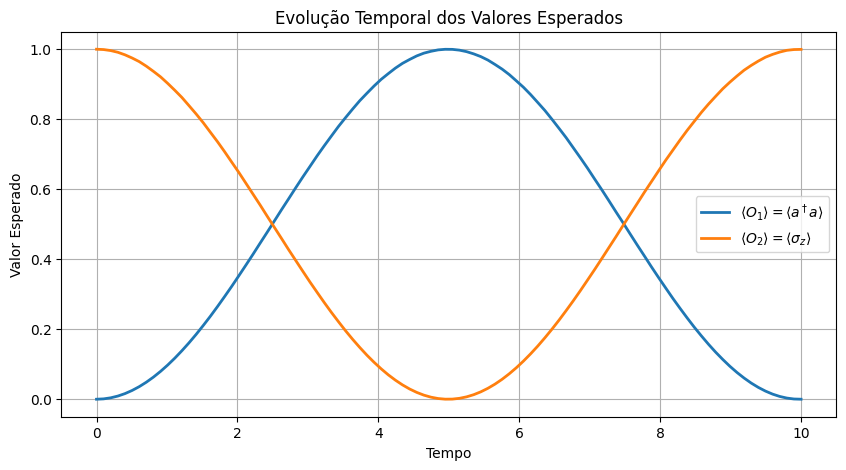

In [15]:
# Observáveis
O1 = a.dag() * a  # Número de fótons no campo
O2 = sm.dag() * sm          # Sigma_z para o átomo

# Convertendo para forma matricial
O1_matrix = O1.full()
O2_matrix = O2.full()

# Calcular valores esperados ao longo do tempo
values_O1 = []
values_O2 = []

for t_idx in range(solution.y.shape[1]):
    state_t = solution.y[:, t_idx]
    values_O1.append(expected_value(state_t, O1_matrix))
    values_O2.append(expected_value(state_t, O2_matrix))


t_eval = solution.t  # Pontos de tempo avaliados

plt.figure(figsize=(10, 5))
plt.plot(t_eval, values_O1, label=r'$\langle O_1 \rangle = \langle a^\dagger a \rangle$', lw=2)
plt.plot(t_eval, values_O2, label=r'$\langle O_2 \rangle = \langle \sigma_z \rangle$', lw=2)
plt.xlabel('Tempo')
plt.ylabel('Valor Esperado')
plt.legend()
plt.title('Evolução Temporal dos Valores Esperados')
plt.grid()
plt.show()

### DOP853

In [16]:
# Resolver as EDOs
t_eval      = np.linspace(0, 10, 100)  # Pontos de avaliação
solution    = solve_ivp(
            ODE_Schrodinger_vector  , 
            (0, 10)                 ,
            psi0.full().flatten()   ,
            args    = (H.full(),)   , 
            t_eval  = t_eval        ,
            method  = 'DOP853'      )

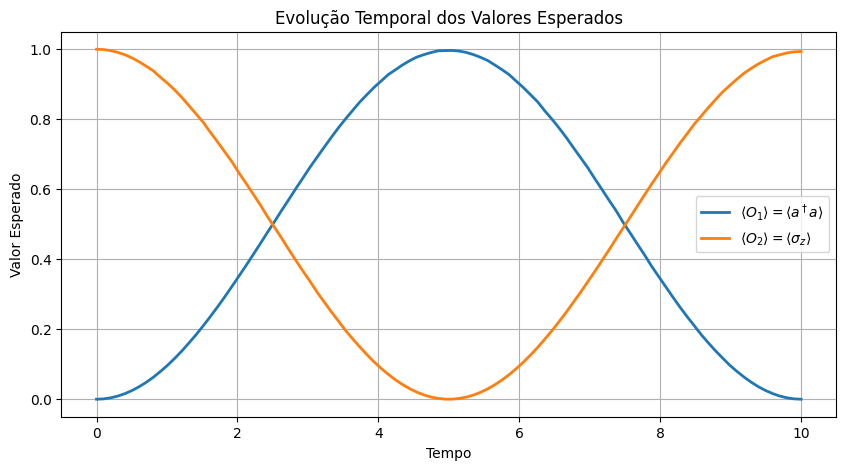

In [17]:
# Observáveis
O1 = a.dag() * a  # Número de fótons no campo
O2 = sm.dag() * sm          # Sigma_z para o átomo

# Convertendo para forma matricial
O1_matrix = O1.full()
O2_matrix = O2.full()

# Calcular valores esperados ao longo do tempo
values_O1 = []
values_O2 = []

for t_idx in range(solution.y.shape[1]):
    state_t = solution.y[:, t_idx]
    values_O1.append(expected_value(state_t, O1_matrix))
    values_O2.append(expected_value(state_t, O2_matrix))

t_eval = solution.t  # Pontos de tempo avaliados

plt.figure(figsize=(10, 5))
plt.plot(t_eval, values_O1, label=r'$\langle O_1 \rangle = \langle a^\dagger a \rangle$', lw=2)
plt.plot(t_eval, values_O2, label=r'$\langle O_2 \rangle = \langle \sigma_z \rangle$', lw=2)
plt.xlabel('Tempo')
plt.ylabel('Valor Esperado')
plt.legend()
plt.title('Evolução Temporal dos Valores Esperados')
plt.grid()
plt.show()

Radau, LSODA não fuciona para estado inicial complexo

In [18]:
# Resolver as EDOs
t_eval      = np.linspace(0, 10, 1000)  # Pontos de avaliação
solution    = solve_ivp(
            ODE_Schrodinger_vector  , 
            (0, 10)                 ,
            psi0.full().flatten()   ,
            args    = (H.full(),)   , 
            t_eval  = t_eval        ,
            method  = 'BDF'      )

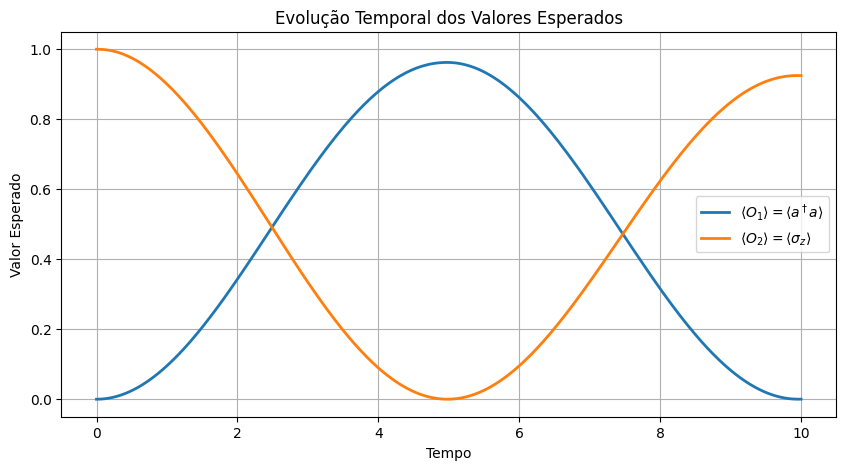

In [19]:
# Observáveis
O1 = a.dag() * a  # Número de fótons no campo
O2 = sm.dag() * sm          # Sigma_z para o átomo

# Convertendo para forma matricial
O1_matrix = O1.full()
O2_matrix = O2.full()

# Calcular valores esperados ao longo do tempo
values_O1 = []
values_O2 = []

for t_idx in range(solution.y.shape[1]):
    state_t = solution.y[:, t_idx]
    values_O1.append(expected_value(state_t, O1_matrix))
    values_O2.append(expected_value(state_t, O2_matrix))

t_eval = solution.t  # Pontos de tempo avaliados

plt.figure(figsize=(10, 5))
plt.plot(t_eval, values_O1, label=r'$\langle O_1 \rangle = \langle a^\dagger a \rangle$', lw=2)
plt.plot(t_eval, values_O2, label=r'$\langle O_2 \rangle = \langle \sigma_z \rangle$', lw=2)
plt.xlabel('Tempo')
plt.ylabel('Valor Esperado')
plt.legend()
plt.title('Evolução Temporal dos Valores Esperados')
plt.grid()
plt.show()

# Funçao SOLVER

In [20]:
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength

basefock = 2

psi0 = bases(basefock, 0)@ bases(2, 0)

# cavity mode operator
a = destruiçao(basefock)@Identidade(2)

# qubit/atom operators
sm = Identidade(basefock)@(destruiçao(2).dag())  # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H_acomplamento = g * ( a*(sm.dag()) + a.dag()*sm )

H = wc * a.dag() * a  + wa * sm.dag()*sm + H_acomplamento

tempo = np.linspace(0, 10, 100)  # Pontos de avaliação


In [21]:
from scipy.integrate import solve_ivp

class edo(ObjQuantico):
    @staticmethod
    def ODE_Schrodinger_vector(t, y, H_matrix):
        dydt = -1j * H_matrix @ y  # Equação de Schrödinger
        return dydt

    @staticmethod
    def solve(H_matrix, t_eval, y0, method='RK45', t_span=None, dense_output=False, 
               events=None, vectorized=False, **options):
        
        if t_span == None:
            t_span = (tempo[0], tempo[-1])  # Intervalo de tempo como tupla
        
        resultado = solve_ivp(
            edo.ODE_Schrodinger_vector,
            t_span,
            y0.full().flatten(),
            method      = method,
            t_eval      = t_eval,
            dense_output=dense_output,
            events      = events,
            vectorized  = vectorized,
            args        = (H_matrix.full(),),
            **options
        )
        return resultado
   
def valor_esperado( state, observable):
    """
    Calcula o valor esperado de uma observável dado o estado.
    
    Args:
        state (ndarray): Vetor de estado no instante de tempo (shape (4,)).
        observable (ndarray): Matriz da observável (shape (4, 4)).
    
    Returns:
        float: Valor esperado.
    """
    state_conj = np.conjugate(state)
    return np.real(state_conj @ (observable @ state)) 
  
def Valor_esperado(state, observables):
    """
    Calcula os valores esperados de uma lista de observáveis ao longo do tempo.
    
    Args:
        observables (list): Lista de objetos observáveis (cada um sendo uma matriz ou um operador).
    
    Returns:
        list: Lista de listas de valores esperados para cada observável ao longo do tempo.
    """
    resultados = []

    # Para cada observável na lista, calcula os valores esperados ao longo do tempo
    for observable in observables:
        observable_matrix = observable.full()  # Convertendo o operador para matriz
        data = []

        # Calcula o valor esperado para cada instante de tempo
        for t_idx in range(state.shape[1]):
            state_t = state[:, t_idx]
            data.append(float(valor_esperado(state_t, observable_matrix)))
        
        resultados.append(data)

    return resultados

In [22]:
# Resolvendo a equação de Schrödinger e calculando o valor esperado
resultado = edo.solve(H, tempo, psi0)

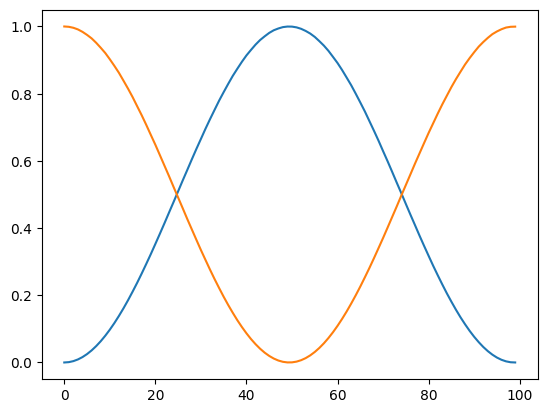

In [23]:
# Definindo as observáveis
O1 = a.dag() * a  # Número de fótons no campo
O2 = sm.dag() * sm  # Sigma_z para o átomo

valores_esperados = Valor_esperado(resultado.y,[O1,O2])
plt.plot(valores_esperados[0])
plt.plot(valores_esperados[1])